# An introduction to machine learning with scikit-learn

## Machine learning: the problem setting

In general, a learning problem considers a set of n samples of data and then tries to predict properties of unknown data. If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), it is said to have several attributes or **features**.

Learning problems fall into a few categories:

* supervised learning, in which the data comes with additional attributes that we want to predict:

>* classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.

>* regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

* unsupervised learning, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization.

**Training set and testing set**

Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the **training set**, on which we learn some properties; we call the other set the **testing set**, on which we test the learned properties.

## Loading an example dataset

scikit-learn comes with a few standard datasets, for instance the iris and digits datasets for classification and the diabetes dataset for regression.

In [ ]:
# load digits dataset


A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the `.data` member, which is a `n_samples`, `n_features` array. In the case of supervised problem, one or more response variables are stored in the `.target` member. More details on the different datasets can be found in the dedicated section.

For instance, in the case of the digits dataset, `digits.data` gives access to the features that can be used to classify the digits samples:

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

### Shape of the data arrays

The data is always a 2D array, shape (n_samples, n_features), although the original data may have had a different shape. In the case of the digits, each original sample is an image of shape (8, 8) and can be accessed using:

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

# Learning and predicting

## Classification

In the case of the digits dataset, the task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.

In scikit-learn, an estimator for classification is a Python object that implements the methods `fit(X, y)` and `predict(T)`.

An example of an estimator is the class `sklearn.svm.SVC`, which implements support vector classification. The estimator’s constructor takes as arguments the model’s parameters.

For now, we will consider the estimator as a black box:

In [ ]:
# instanciate an instance of SVC with gamma=0.001 and C=100.



Choosing the parameters of the model

In this example, we set the value of `gamma` manually. To find good values for these parameters, we can use tools such as grid search and cross validation from sklearn. We can even use an exteranal tools to automate the process of Algorithm selection and hyperparameter optimization (tuning); i.e. an autoML tool such as autoSkLearn or TPOT.

You can read more about autoML tools from [this survey](https://arxiv.org/pdf/1904.12054.pdf)

The `clf` (for classifier) estimator instance is first fitted to the model; that is, it must learn from the model. This is done by passing our training set to the `fit` method. For the training set, we’ll use 80% the images from our dataset. The remaining 20% of dataset will be reserved for our predicting. We select the training and prediction sets using `train_test_split` function.

In [ ]:
from sklearn.model_selection import train_test_split

X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(# complete here)

In [ ]:
clf.fit(X_train, y_train)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Now, we can use the classifier `clf` predict new instance and test it over the test split. In the following, we'll create a dataframe that holds the predicted and actual labels to visually compare them.

In [ ]:
import pandas as pd

y_pred = clf.predict(X_test)
result = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
result

,y_test,y_pred
0,6,6
1,9,9
2,3,3
3,7,7
4,2,2
...,...,...
589,8,8
590,9,9
591,4,4
592,9,9


It seems to be difficult to visually compare them. So, we will use and evaluation metric such as accuracy. You can later on use Recall, Precision, AUC, or whatever suits your problem requirements. 

In [ ]:
from sklearn.metrics import accuracy_score

print('The model accuracy is : {}'.format(accuracy_score(# fill this area)))

The model accuracy is : 0.98989898989899


Looks good! :) 

In [ ]:
X_test[0:]

array([[ 0.,  0.,  0., ..., 14.,  5.,  0.],
       [ 0.,  0., 11., ...,  1.,  0.,  0.],
       [ 0.,  0.,  8., ...,  8.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 0.,  0.,  9., ...,  9.,  0.,  0.],
       [ 0.,  0.,  3., ...,  5.,  0.,  0.]])

## Regression

### Linear Regression Example
This example uses the only the first feature of the `diabetes` dataset, in order to illustrate a two-dimensional plot of this regression technique. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

The coefficients, the residual sum of squares and the coefficient of determination are also calculated

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


In [ ]:
# Load the diabetes dataset and return X and y


In [ ]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [ ]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [ ]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [ ]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [938.23786125]


In [ ]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Mean squared error: 2548.07


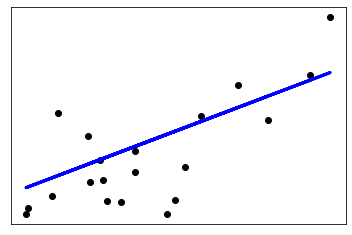

In [ ]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Now, you can try it using the full dataset and report the mean_squared_error.






Can you plot the results? why?

Answer: ...

## Clustering 

In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

X_digits, y_digits = load_digits(return_X_y=True)
n_digits = len(np.unique(y_digits))
data = scale(X_digits)

sample_size = 300

kmeans = KMeans(init='random', n_clusters=n_digits, n_init=10)
kmeans.fit(data)
print('silhouette_score = {}'.format(metrics.silhouette_score(data, model.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))




silhouette_score = 0.13422373894926692


For silhouette score, the best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

Two visualize the outcome in a 2D graph, we need to reduce the image representation from 8x8 = 16 components for each image to only 2 components. We will use PCA to achieve this task as follows:

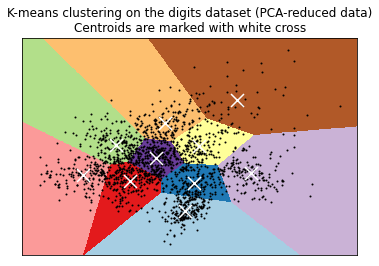

In [ ]:
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()